In [110]:
import pandas as pd
import numpy as np

from sklearn.metrics import auc, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay

In [118]:
colNames = []
for i in range(51):
    colNames.append(f'B{i}')

test = pd.read_csv('Yolov5_anno_a.txt', sep=' ', names=colNames, header=None)

In [119]:
test = test.fillna(0)

In [124]:
len(test)

84

In [125]:
testData = []
colSizeTest = []
# tmp = np.arr
for i in range(len(test)):
    colIter = 0
    for j in range(1,51):
        tmp = test.iloc[i][j]
        if tmp != 0:
            colIter += 1
            tmp2 = tmp.split(',')
            print(tmp2)
            tmp4 = list(map(float, tmp2))
            testData.append(tmp4)
    colSizeTest.append(colIter)
    
fileNamesTest = test['B0']

['42', '168', '68', '217', '2']
['1', '162', '22', '193', '2']
['30', '136', '47', '162', '2']
['137', '167', '180', '235', '1']
['229', '156', '265', '215', '1']
['315', '203', '343', '245', '2']
['85', '131', '99', '148', '2']
['173', '140', '186', '167', '2']
['134', '277', '267', '397', '1']
['17', '281', '35', '312', '1']
['17', '155', '25', '179', '1']
['49', '150', '62', '174', '1']
['17', '196', '27', '222', '2']
['4', '205', '14', '234', '2']
['112', '90', '136', '126', '1']
['144', '98', '166', '130', '1']
['190', '104', '214', '143', '1']
['257', '112', '277', '146', '1']
['302', '99', '326', '138', '1']
['397', '148', '412', '169', '1']
['397', '192', '413', '224', '2']
['180', '232', '312', '359', '1']
['92', '31', '116', '67', '1']
['300', '31', '322', '67', '2']
['1', '82', '24', '115', '1']
['29', '103', '43', '126', '1']
['93', '81', '107', '106', '1']
['116', '76', '138', '112', '1']
['137', '88', '149', '110', '1']
['156', '103', '172', '126', '1']
['186', '103', '20

In [126]:
testData

[[42.0, 168.0, 68.0, 217.0, 2.0],
 [1.0, 162.0, 22.0, 193.0, 2.0],
 [30.0, 136.0, 47.0, 162.0, 2.0],
 [137.0, 167.0, 180.0, 235.0, 1.0],
 [229.0, 156.0, 265.0, 215.0, 1.0],
 [315.0, 203.0, 343.0, 245.0, 2.0],
 [85.0, 131.0, 99.0, 148.0, 2.0],
 [173.0, 140.0, 186.0, 167.0, 2.0],
 [134.0, 277.0, 267.0, 397.0, 1.0],
 [17.0, 281.0, 35.0, 312.0, 1.0],
 [17.0, 155.0, 25.0, 179.0, 1.0],
 [49.0, 150.0, 62.0, 174.0, 1.0],
 [17.0, 196.0, 27.0, 222.0, 2.0],
 [4.0, 205.0, 14.0, 234.0, 2.0],
 [112.0, 90.0, 136.0, 126.0, 1.0],
 [144.0, 98.0, 166.0, 130.0, 1.0],
 [190.0, 104.0, 214.0, 143.0, 1.0],
 [257.0, 112.0, 277.0, 146.0, 1.0],
 [302.0, 99.0, 326.0, 138.0, 1.0],
 [397.0, 148.0, 412.0, 169.0, 1.0],
 [397.0, 192.0, 413.0, 224.0, 2.0],
 [180.0, 232.0, 312.0, 359.0, 1.0],
 [92.0, 31.0, 116.0, 67.0, 1.0],
 [300.0, 31.0, 322.0, 67.0, 2.0],
 [1.0, 82.0, 24.0, 115.0, 1.0],
 [29.0, 103.0, 43.0, 126.0, 1.0],
 [93.0, 81.0, 107.0, 106.0, 1.0],
 [116.0, 76.0, 138.0, 112.0, 1.0],
 [137.0, 88.0, 149.0, 110.0, 

In [127]:
colSizeTest
fibTest = []
fibTest.append(0)
totalTest = 0
for i in range(0,len(colSizeTest)):
    totalTest = totalTest + colSizeTest[i]
    fibTest.append(totalTest)

In [128]:
fileNamesTest

0     maksssksksss104_png.rf.67187f00e0dc669fa4c8588...
1     maksssksksss10_png.rf.5a9fa4add22945d5784b7a98...
2     maksssksksss111_png.rf.c1f90ca5e9c580ff3d5f208...
3     maksssksksss117_png.rf.7e94cfdd2103f274d64e990...
4     maksssksksss153_png.rf.e4eb83960a295b2e0c2d999...
                            ...                        
79    maksssksksss831_png.rf.971da7c17a9dfd12a0505c5...
80    maksssksksss837_png.rf.162eec716963758443b3a71...
81    maksssksksss843_png.rf.586d007328db9c4523fa1ec...
82    maksssksksss845_png.rf.d3bb56b345ecc5c23ba3ad5...
83    maksssksksss849_png.rf.43f9c74f431779808e71b68...
Name: B0, Length: 84, dtype: object

In [129]:
listGTBoxesDict = []

for i in range(len(fibTest)-1):
    GTBox = []
    for j in range(fibTest[i],fibTest[i+1]):
        GTBox.append(testData[j][0:4])
        
    GTBoxDict = {fileNamesTest[i]: GTBox}
    listGTBoxesDict.append(GTBoxDict)

In [130]:
# listPredBoxesDict = {}

for i in range(len(fibTest)-1):
    GTBox = []
    for j in range(fibTest[i],fibTest[i+1]):#########
        GTBox.append(testData[j][0:4])
        
    GTBoxDict = {fileNamesTest[i]: GTBox}
    if i == 0:
        dictGTBoxesDict = GTBoxDict
    else:
        dictGTBoxesDict.update(GTBoxDict)

In [131]:
listGTBoxesDict

[{'maksssksksss104_png.rf.67187f00e0dc669fa4c8588f18a52d56.txt': [[42.0,
    168.0,
    68.0,
    217.0],
   [1.0, 162.0, 22.0, 193.0],
   [30.0, 136.0, 47.0, 162.0],
   [137.0, 167.0, 180.0, 235.0],
   [229.0, 156.0, 265.0, 215.0],
   [315.0, 203.0, 343.0, 245.0],
   [85.0, 131.0, 99.0, 148.0],
   [173.0, 140.0, 186.0, 167.0]]},
 {'maksssksksss10_png.rf.5a9fa4add22945d5784b7a98ac417d23.txt': [[134.0,
    277.0,
    267.0,
    397.0]]},
 {'maksssksksss111_png.rf.c1f90ca5e9c580ff3d5f2088bae269ea.txt': [[17.0,
    281.0,
    35.0,
    312.0],
   [17.0, 155.0, 25.0, 179.0],
   [49.0, 150.0, 62.0, 174.0],
   [17.0, 196.0, 27.0, 222.0],
   [4.0, 205.0, 14.0, 234.0],
   [112.0, 90.0, 136.0, 126.0],
   [144.0, 98.0, 166.0, 130.0],
   [190.0, 104.0, 214.0, 143.0],
   [257.0, 112.0, 277.0, 146.0],
   [302.0, 99.0, 326.0, 138.0],
   [397.0, 148.0, 412.0, 169.0],
   [397.0, 192.0, 413.0, 224.0]]},
 {'maksssksksss117_png.rf.7e94cfdd2103f274d64e99014148fc3c.txt': [[180.0,
    232.0,
    312.0,
    

In [132]:
dictGTBoxesDict

{'maksssksksss104_png.rf.67187f00e0dc669fa4c8588f18a52d56.txt': [[42.0,
   168.0,
   68.0,
   217.0],
  [1.0, 162.0, 22.0, 193.0],
  [30.0, 136.0, 47.0, 162.0],
  [137.0, 167.0, 180.0, 235.0],
  [229.0, 156.0, 265.0, 215.0],
  [315.0, 203.0, 343.0, 245.0],
  [85.0, 131.0, 99.0, 148.0],
  [173.0, 140.0, 186.0, 167.0]],
 'maksssksksss10_png.rf.5a9fa4add22945d5784b7a98ac417d23.txt': [[134.0,
   277.0,
   267.0,
   397.0]],
 'maksssksksss111_png.rf.c1f90ca5e9c580ff3d5f2088bae269ea.txt': [[17.0,
   281.0,
   35.0,
   312.0],
  [17.0, 155.0, 25.0, 179.0],
  [49.0, 150.0, 62.0, 174.0],
  [17.0, 196.0, 27.0, 222.0],
  [4.0, 205.0, 14.0, 234.0],
  [112.0, 90.0, 136.0, 126.0],
  [144.0, 98.0, 166.0, 130.0],
  [190.0, 104.0, 214.0, 143.0],
  [257.0, 112.0, 277.0, 146.0],
  [302.0, 99.0, 326.0, 138.0],
  [397.0, 148.0, 412.0, 169.0],
  [397.0, 192.0, 413.0, 224.0]],
 'maksssksksss117_png.rf.7e94cfdd2103f274d64e99014148fc3c.txt': [[180.0,
   232.0,
   312.0,
   359.0]],
 'maksssksksss153_png.rf.e4e

## Predction DATA

In [133]:
colNamesYolo = []
for i in range(26):
    colNamesYolo.append(f'B{i}')

testYolo = pd.read_csv('Yolov5_test_data_a.txt', sep='[', names=colNamesYolo, header=None)

In [134]:
testYolo = testYolo.fillna(0)

In [135]:
len(testYolo.index)

84

In [136]:
predictData = []
colSize = []
# tmp = np.arr
for i in range(len(testYolo.index)):
    colIter = 0
    for j in range(1,26):
        tmp = testYolo.iloc[i][j]
        if tmp != 0:
            colIter += 1
            tmp2 = tmp.replace("]", "")
            tmp3 = tmp2.replace(" ", "").replace("'", "").split(',')
            tmp4 = list(map(float, tmp3))
            predictData.append(tmp4)
    colSize.append(colIter)
    
tmp = testYolo['B0']
fileNamesPredict = []
for name in range(len(tmp)):
    fileNamesPredict.append(tmp[name].replace(',','').replace('test/', ''))

In [137]:
predictData

[[85.0, 136.0, 99.0, 170.0, 1.0, 1.0, 1.0],
 [336.0, 109.0, 357.0, 141.0, 1.0, 1.0, 1.0],
 [316.0, 201.0, 342.0, 244.0, 1.0, 1.0, 2.0],
 [29.0, 137.0, 46.0, 162.0, 1.0, 1.0, 2.0],
 [43.0, 168.0, 69.0, 209.0, 1.0, 1.0, 2.0],
 [134.0, 164.0, 181.0, 237.0, 1.0, 1.0, 1.0],
 [227.0, 153.0, 266.0, 216.0, 1.0, 1.0, 1.0],
 [135.0, 277.0, 268.0, 401.0, 1.0, 1.0, 1.0],
 [398.0, 143.0, 414.0, 171.0, 1.0, 1.0, 1.0],
 [49.0, 148.0, 63.0, 173.0, 1.0, 1.0, 1.0],
 [113.0, 90.0, 138.0, 126.0, 1.0, 1.0, 1.0],
 [259.0, 112.0, 279.0, 145.0, 1.0, 1.0, 1.0],
 [189.0, 102.0, 215.0, 143.0, 1.0, 1.0, 1.0],
 [145.0, 95.0, 167.0, 132.0, 1.0, 1.0, 1.0],
 [302.0, 99.0, 327.0, 137.0, 1.0, 1.0, 1.0],
 [180.0, 231.0, 311.0, 358.0, 1.0, 1.0, 1.0],
 [302.0, 32.0, 324.0, 64.0, 1.0, 1.0, 2.0],
 [140.0, 94.0, 150.0, 110.0, 1.0, 1.0, 1.0],
 [157.0, 105.0, 173.0, 126.0, 1.0, 1.0, 1.0],
 [304.0, 83.0, 322.0, 113.0, 1.0, 1.0, 1.0],
 [292.0, 88.0, 304.0, 107.0, 1.0, 1.0, 1.0],
 [366.0, 97.0, 385.0, 127.0, 1.0, 1.0, 1.0],
 [118

In [138]:
(colSize)
fib = []
fib.append(0)
total = 0
for i in range(0,len(colSize)):
    total = total + colSize[i]
    fib.append(total)
colSize

[7,
 1,
 7,
 1,
 1,
 12,
 4,
 3,
 1,
 4,
 4,
 1,
 1,
 2,
 5,
 2,
 12,
 5,
 1,
 15,
 3,
 1,
 7,
 1,
 6,
 2,
 8,
 1,
 13,
 2,
 1,
 6,
 1,
 4,
 1,
 1,
 4,
 3,
 2,
 2,
 4,
 13,
 3,
 2,
 1,
 1,
 1,
 17,
 2,
 3,
 5,
 11,
 1,
 6,
 6,
 3,
 3,
 1,
 7,
 5,
 3,
 1,
 3,
 2,
 2,
 1,
 8,
 3,
 4,
 1,
 5,
 13,
 6,
 2,
 4,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 4]

In [139]:
pred1 = []
for ll in range(colSize[0]):
    pred1.append(predictData[ll][0:4])
    
score1 = []
for ll in range(colSize[0]):
    score1.append(predictData[ll][4])

score1

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#### Converting to IoC format: dictionaries

In [140]:
predictData

[[85.0, 136.0, 99.0, 170.0, 1.0, 1.0, 1.0],
 [336.0, 109.0, 357.0, 141.0, 1.0, 1.0, 1.0],
 [316.0, 201.0, 342.0, 244.0, 1.0, 1.0, 2.0],
 [29.0, 137.0, 46.0, 162.0, 1.0, 1.0, 2.0],
 [43.0, 168.0, 69.0, 209.0, 1.0, 1.0, 2.0],
 [134.0, 164.0, 181.0, 237.0, 1.0, 1.0, 1.0],
 [227.0, 153.0, 266.0, 216.0, 1.0, 1.0, 1.0],
 [135.0, 277.0, 268.0, 401.0, 1.0, 1.0, 1.0],
 [398.0, 143.0, 414.0, 171.0, 1.0, 1.0, 1.0],
 [49.0, 148.0, 63.0, 173.0, 1.0, 1.0, 1.0],
 [113.0, 90.0, 138.0, 126.0, 1.0, 1.0, 1.0],
 [259.0, 112.0, 279.0, 145.0, 1.0, 1.0, 1.0],
 [189.0, 102.0, 215.0, 143.0, 1.0, 1.0, 1.0],
 [145.0, 95.0, 167.0, 132.0, 1.0, 1.0, 1.0],
 [302.0, 99.0, 327.0, 137.0, 1.0, 1.0, 1.0],
 [180.0, 231.0, 311.0, 358.0, 1.0, 1.0, 1.0],
 [302.0, 32.0, 324.0, 64.0, 1.0, 1.0, 2.0],
 [140.0, 94.0, 150.0, 110.0, 1.0, 1.0, 1.0],
 [157.0, 105.0, 173.0, 126.0, 1.0, 1.0, 1.0],
 [304.0, 83.0, 322.0, 113.0, 1.0, 1.0, 1.0],
 [292.0, 88.0, 304.0, 107.0, 1.0, 1.0, 1.0],
 [366.0, 97.0, 385.0, 127.0, 1.0, 1.0, 1.0],
 [118

In [141]:
listPredBoxesDict = []

for i in range(len(fib)-1):
    predBox = []
    predScore = []
    for j in range(fib[i],fib[i+1]):
        predBox.append(predictData[j][0:4])
        predScore.append(predictData[j][4])
        
    yoloBoxDict = {fileNamesPredict[i]: {"boxes": predBox, "scores": predScore}}
    listPredBoxesDict.append(yoloBoxDict)

In [142]:
range(len(colSize))

range(0, 84)

In [143]:
# listPredBoxesDict = {}

for i in range(len(fib)-1):
    predBox = []
    predScore = []
    for j in range(fib[i],fib[i+1]):###############
        predBox.append(predictData[j][0:4])
        predScore.append(predictData[j][4])
        
    yoloBoxDict = {fileNamesPredict[i]: {"boxes": predBox, "scores": predScore}}
    if i == 0:
        dictPredBoxesDict = yoloBoxDict
    else:
        dictPredBoxesDict.update(yoloBoxDict)

In [144]:
i=0
range(colSize[i],colSize[i+1])

range(7, 1)

In [145]:
listPredBoxesDict

[{'maksssksksss104_png.rf.67187f00e0dc669fa4c8588f18a52d56.txt': {'boxes': [[85.0,
     136.0,
     99.0,
     170.0],
    [336.0, 109.0, 357.0, 141.0],
    [316.0, 201.0, 342.0, 244.0],
    [29.0, 137.0, 46.0, 162.0],
    [43.0, 168.0, 69.0, 209.0],
    [134.0, 164.0, 181.0, 237.0],
    [227.0, 153.0, 266.0, 216.0]],
   'scores': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}},
 {'maksssksksss10_png.rf.5a9fa4add22945d5784b7a98ac417d23.txt': {'boxes': [[135.0,
     277.0,
     268.0,
     401.0]],
   'scores': [1.0]}},
 {'maksssksksss111_png.rf.c1f90ca5e9c580ff3d5f2088bae269ea.txt': {'boxes': [[398.0,
     143.0,
     414.0,
     171.0],
    [49.0, 148.0, 63.0, 173.0],
    [113.0, 90.0, 138.0, 126.0],
    [259.0, 112.0, 279.0, 145.0],
    [189.0, 102.0, 215.0, 143.0],
    [145.0, 95.0, 167.0, 132.0],
    [302.0, 99.0, 327.0, 137.0]],
   'scores': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}},
 {'maksssksksss117_png.rf.7e94cfdd2103f274d64e99014148fc3c.txt': {'boxes': [[180.0,
     231.0,
     311.0,
    

In [146]:
dictPredBoxesDict

{'maksssksksss104_png.rf.67187f00e0dc669fa4c8588f18a52d56.txt': {'boxes': [[85.0,
    136.0,
    99.0,
    170.0],
   [336.0, 109.0, 357.0, 141.0],
   [316.0, 201.0, 342.0, 244.0],
   [29.0, 137.0, 46.0, 162.0],
   [43.0, 168.0, 69.0, 209.0],
   [134.0, 164.0, 181.0, 237.0],
   [227.0, 153.0, 266.0, 216.0]],
  'scores': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]},
 'maksssksksss10_png.rf.5a9fa4add22945d5784b7a98ac417d23.txt': {'boxes': [[135.0,
    277.0,
    268.0,
    401.0]],
  'scores': [1.0]},
 'maksssksksss111_png.rf.c1f90ca5e9c580ff3d5f2088bae269ea.txt': {'boxes': [[398.0,
    143.0,
    414.0,
    171.0],
   [49.0, 148.0, 63.0, 173.0],
   [113.0, 90.0, 138.0, 126.0],
   [259.0, 112.0, 279.0, 145.0],
   [189.0, 102.0, 215.0, 143.0],
   [145.0, 95.0, 167.0, 132.0],
   [302.0, 99.0, 327.0, 137.0]],
  'scores': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]},
 'maksssksksss117_png.rf.7e94cfdd2103f274d64e99014148fc3c.txt': {'boxes': [[180.0,
    231.0,
    311.0,
    358.0]],
  'scores': [1.0]},
 'ma

In [147]:
import numpy as np
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [148]:
def get_model_scores(pred_boxes):
    """Creates a dictionary of from model_scores to image ids.
    Args:
        pred_boxes (dict): dict of dicts of 'boxes' and 'scores'
    Returns:
        dict: keys are model_scores and values are image ids (usually filenames)
    """
    model_score={}
    for img_id, val in pred_boxes.items():
        for score in val['scores']:
            if score not in model_score.keys():
                model_score[score]=[img_id]
            else:
                model_score[score].append(img_id)
    return model_score

## Calculating Scores

In [149]:
def calc_iou(gt_bbox, pred_bbox):
    '''
    This function takes the predicted bounding box and ground truth bounding box and 
    return the IoU ratio
    '''
    x_topleft_gt, y_topleft_gt, x_bottomright_gt, y_bottomright_gt= gt_bbox
    x_topleft_p, y_topleft_p, x_bottomright_p, y_bottomright_p= pred_bbox
    
    if (x_topleft_gt > x_bottomright_gt) or (y_topleft_gt> y_bottomright_gt):
        raise AssertionError("Ground Truth Bounding Box is not correct")
    if (x_topleft_p > x_bottomright_p) or (y_topleft_p> y_bottomright_p):
        raise AssertionError("Predicted Bounding Box is not correct",x_topleft_p, x_bottomright_p,y_topleft_p,y_bottomright_gt)
        
         
    #if the GT bbox and predcited BBox do not overlap then iou=0
    if(x_bottomright_gt< x_topleft_p):
        # If bottom right of x-coordinate  GT  bbox is less than or above the top left of x coordinate of  the predicted BBox
        
        return 0.0
    if(y_bottomright_gt< y_topleft_p):  # If bottom right of y-coordinate  GT  bbox is less than or above the top left of y coordinate of  the predicted BBox
        
        return 0.0
    if(x_topleft_gt> x_bottomright_p): # If bottom right of x-coordinate  GT  bbox is greater than or below the bottom right  of x coordinate of  the predcited BBox
        
        return 0.0
    if(y_topleft_gt> y_bottomright_p): # If bottom right of y-coordinate  GT  bbox is greater than or below the bottom right  of y coordinate of  the predcited BBox
        
        return 0.0
    
    
    GT_bbox_area = (x_bottomright_gt -  x_topleft_gt + 1) * (  y_bottomright_gt -y_topleft_gt + 1)
    Pred_bbox_area =(x_bottomright_p - x_topleft_p + 1 ) * ( y_bottomright_p -y_topleft_p + 1)
    
    x_top_left =np.max([x_topleft_gt, x_topleft_p])
    y_top_left = np.max([y_topleft_gt, y_topleft_p])
    x_bottom_right = np.min([x_bottomright_gt, x_bottomright_p])
    y_bottom_right = np.min([y_bottomright_gt, y_bottomright_p])
    
    intersection_area = (x_bottom_right- x_top_left + 1) * (y_bottom_right-y_top_left  + 1)
    
    union_area = (GT_bbox_area + Pred_bbox_area - intersection_area)
   
    return intersection_area/union_area

In [150]:
maxScores = []
meanScores = []
for imageName in fileNamesTest:
    gtBoxes = np.array(dictGTBoxesDict[imageName])
    predBoxes = np.array(dictPredBoxesDict[imageName]['boxes'])
    ioc_score = []
    for gt_bbox in gtBoxes:
        iocScoreBox = []
        for pred_bbox in predBoxes:
            print(gt_bbox)
            print(pred_bbox)
            iocScoreBox.append(calc_iou(gt_bbox, pred_bbox))
            
        ioc_score.append(max(iocScoreBox))
        
    maxScores.append(ioc_score)
    meanScores.append(np.mean(ioc_score))

[ 42. 168.  68. 217.]
[ 85. 136.  99. 170.]
[ 42. 168.  68. 217.]
[336. 109. 357. 141.]
[ 42. 168.  68. 217.]
[316. 201. 342. 244.]
[ 42. 168.  68. 217.]
[ 29. 137.  46. 162.]
[ 42. 168.  68. 217.]
[ 43. 168.  69. 209.]
[ 42. 168.  68. 217.]
[134. 164. 181. 237.]
[ 42. 168.  68. 217.]
[227. 153. 266. 216.]
[  1. 162.  22. 193.]
[ 85. 136.  99. 170.]
[  1. 162.  22. 193.]
[336. 109. 357. 141.]
[  1. 162.  22. 193.]
[316. 201. 342. 244.]
[  1. 162.  22. 193.]
[ 29. 137.  46. 162.]
[  1. 162.  22. 193.]
[ 43. 168.  69. 209.]
[  1. 162.  22. 193.]
[134. 164. 181. 237.]
[  1. 162.  22. 193.]
[227. 153. 266. 216.]
[ 30. 136.  47. 162.]
[ 85. 136.  99. 170.]
[ 30. 136.  47. 162.]
[336. 109. 357. 141.]
[ 30. 136.  47. 162.]
[316. 201. 342. 244.]
[ 30. 136.  47. 162.]
[ 29. 137.  46. 162.]
[ 30. 136.  47. 162.]
[ 43. 168.  69. 209.]
[ 30. 136.  47. 162.]
[134. 164. 181. 237.]
[ 30. 136.  47. 162.]
[227. 153. 266. 216.]
[137. 167. 180. 235.]
[ 85. 136.  99. 170.]
[137. 167. 180. 235.]
[336. 109.

In [151]:
len(colSizeTest)

84

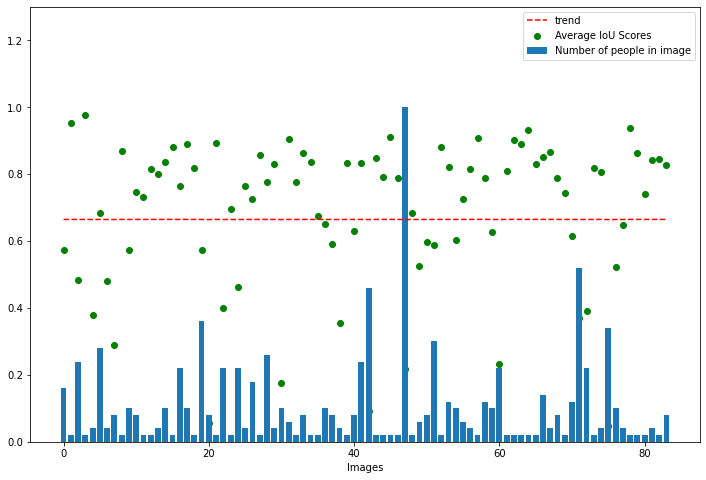

In [152]:
#%matplotlib widget
import matplotlib.pyplot as plt

trend = np.polyfit(range(len(meanScores)), meanScores, 1)
trend1 = np.poly1d(trend)
plt.figure(figsize=(12,8))
plt.scatter(range(len(meanScores)), meanScores, color='g', label='Average IoU Scores')
plt.plot(trend1((meanScores)), '--r', label='trend')
plt.bar(range(len(meanScores)),colSizeTest/np.max(colSizeTest), label='Number of people in image')
plt.xlabel('Images')
plt.ylim([0,1.3])
plt.legend(loc='best')

### Precision-Recall Curve

In [159]:
def calc_precision_recall(image_results):
    """Calculates precision and recall from the set of images
    Args:
        img_results (dict): dictionary formatted like:
            {
                'img_id1': {'true_pos': int, 'false_pos': int, 'false_neg': int},
                'img_id2': ...
                ...
            }
    Returns:
        tuple: of floats of (precision, recall)
    """
    true_positive=0
    false_positive=0
    false_negative=0
    for img_id, res in image_results.items():
        true_positive +=res['true_positive']
        false_positive += res['false_positive']
        false_negative += res['false_negative']
        try:
            precision = np.abs(true_positive)/(np.abs(true_positive) + np.abs(false_positive))
        except ZeroDivisionError:
            precision=0.0
        try:
            recall = np.abs(true_positive)/(np.abs(true_positive) + np.abs(false_negative))
        except ZeroDivisionError:
            recall=0.0
    return (precision, recall)

In [160]:
def get_single_image_results(gt_boxes, pred_boxes, iou_thr):
    """Calculates number of true_pos, false_pos, false_neg from single batch of boxes.
    Args:
        gt_boxes (list of list of floats): list of locations of ground truth
            objects as [xmin, ymin, xmax, ymax]
        pred_boxes (dict): dict of dicts of 'boxes' (formatted like `gt_boxes`)
            and 'scores'
        iou_thr (float): value of IoU to consider as threshold for a
            true prediction.
    Returns:
        dict: true positives (int), false positives (int), false negatives (int)
    """
    all_pred_indices= range(len(pred_boxes))
    all_gt_indices=range(len(gt_boxes))
    if len(all_pred_indices)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    if len(all_gt_indices)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    
    gt_idx_thr=[]
    pred_idx_thr=[]
    ious=[]
    for ipb, pred_box in enumerate(pred_boxes['boxes']):
        for igb, gt_box in enumerate(gt_boxes):
            iou= calc_iou(gt_box, pred_box)
            
            if iou >iou_thr:
                gt_idx_thr.append(igb)
                pred_idx_thr.append(ipb)
                ious.append(iou)
    iou_sort = np.argsort(ious)[::1]
    if len(iou_sort)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    else:
        gt_match_idx=[]
        pred_match_idx=[]
        for idx in iou_sort:
            gt_idx=gt_idx_thr[idx]
            pr_idx= pred_idx_thr[idx]
            # If the boxes are unmatched, add them to matches
            if(gt_idx not in gt_match_idx) and (pr_idx not in pred_match_idx):
                gt_match_idx.append(gt_idx)
                pred_match_idx.append(pr_idx)
        tp= len(gt_match_idx)
        fp= len(pred_boxes) - len(pred_match_idx)
        fn = len(gt_boxes) - len(gt_match_idx)
    return {'true_positive': tp, 'false_positive': fp, 'false_negative': fn}

In [161]:
IoU_thr = 0.7
imageResultsDict = {}
for imageName in fileNamesTest:
    imageResultsDict[imageName] = get_single_image_results(dictGTBoxesDict[imageName], dictPredBoxesDict[imageName], IoU_thr)    

In [162]:
precision, recall = calc_precision_recall(imageResultsDict)
print(precision, recall)

0.75 0.5576470588235294
